In [3]:
import pandas as pd
data = pd.read_csv('inspections.csv')
data.head()

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,JOHN'S FAMOUS MEAT & DELI INC.,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,HOVIK'S FAMOUS MEAT & DELI,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION
1,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,"SCO, LLC",RESTAURANT (61-150) SEATS HIGH RISK,1638,SHAKEY'S PIZZA,ACTIVE,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION
2,2017-04-04,EE0000593,17515 CHATSWORTH ST,GRANADA HILLS,FA0007801,BAITH AL HALAL,CA,91344,A,OW0031150,SABIR MOHAMMAD SHAHID,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,BAITH AL HALAL,INACTIVE,PR0036723,95,DAL2PIKJU,1,ROUTINE INSPECTION
3,2017-08-15,EE0000971,44455 VALLEY CENTRAL WAY,LANCASTER,FA0013858,FOOD 4 LESS #306,CA,93536,A,OW0012108,"FOOD 4 LESS, INC.",RESTAURANT (0-30) SEATS HIGH RISK,1632,FOOD 4 LESS DELI/BAKERY#306,ACTIVE,PR0039905,98,DA0ZMAJXZ,1,ROUTINE INSPECTION
4,2016-09-26,EE0000145,11700 SOUTH ST,ARTESIA,FA0179671,PHO LITTLE SAIGON,CA,90701,A,OW0185167,PHO SOUTH ST INC,RESTAURANT (61-150) SEATS HIGH RISK,1638,PHO LITTLE SAIGON,ACTIVE,PR0173311,96,DA41DBXA2,1,ROUTINE INSPECTION


In [5]:
# Get mean of all scores per employee_id
employee_score = data.loc[:, ['employee_id','score']].groupby(['employee_id']).mean();

# Sort them descending and pick top 3
top_3 = employee_score.sort_values(by=['score'], ascending=False).head(3);
print(top_3)

# Sort them asecnding and pick top 3
bottom_3 = employee_score.sort_values(by=['score'], ascending=True).head(3);
print(bottom_3)

                  score
employee_id            
EE0000252    100.000000
EE0000284     98.651515
EE0000259     98.133333
                 score
employee_id           
EE0000821    88.893741
EE0000699    90.188718
EE0000719    90.195122


In [7]:
# Localize the dataset to only columns that matter
facilities = data.loc[:, ['facility_city','facility_id','facility_name','score']];

# Get mean scores per city
city_scores = facilities.groupby(['facility_city']).mean();

# Top most city for mean scores
top_city = city_scores.sort_values(by='score', ascending=False).head(1)
print(top_city)

# Bottom city for mean scores
bottom_city = city_scores.sort_values(by='score', ascending=True).head(1)
print(bottom_city)

                   score
facility_city           
SOUTH SAN GABRIEL   99.5
                score
facility_city        
LEONA VALLEY   87.375


In [8]:
city_facilities = data.loc[:,['facility_name', 'facility_id','score','employee_id','activity_date']]
print(city_facilities[(city_facilities['facility_name'] == 'SUBWAY') & (city_facilities['facility_id'] == 'FA0034716')])

       facility_name facility_id  score employee_id activity_date
188           SUBWAY   FA0034716     95   EE0000923    2015-11-04
7440          SUBWAY   FA0034716     96   EE0000923    2017-01-18
59423         SUBWAY   FA0034716     95   EE0000923    2016-08-02
64055         SUBWAY   FA0034716     90   EE0000923    2017-10-23
101732        SUBWAY   FA0034716     93   EE0000923    2016-04-05


In [9]:
# localize data to useful columns
# drop duplicate records of scores for same location at a different date.
# group by facility_name to count unique locations per facility_name
# sort and pick top
top_facility = facilities.loc[:,['facility_name', 'facility_id']]\
                    .drop_duplicates()\
                    .groupby('facility_name')\
                    .count()\
                    .rename(columns={'facility_id':'count'})\
                    .sort_values(by='count', ascending=False)\
                    .head(1)

print(top_facility)

               count
facility_name       
SUBWAY           131


                  score
facility_city          
PEARBLOSSOM    5.083333
               score
facility_city       
VALLEY GLEN     -7.5


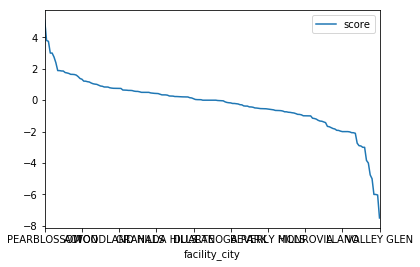

In [61]:
# Extract city's score with date
%matplotlib inline

city_scores = data.loc[:,['activity_date','facility_city','score']];

# Convert the date to datetime object
city_scores['activity_date'] = pd.to_datetime(city_scores['activity_date']);

# For scores that are missing, use the average of the score for the city
city_scores['score'] = city_scores['score'].fillna(city_scores.groupby(['facility_city']).mean().to_dict());

# Aggregate by year, city 
city_annual_mean = city_scores.groupby(['facility_city', city_scores['activity_date'].dt.year]).mean().reset_index()

city_improvization = city_annual_mean.loc[:, ['facility_city','score']].groupby('facility_city').agg(lambda x:x.iloc[-1] - x.iloc[0]).sort_values(by='score', ascending=False)
print(city_improvization.head(1))
print(city_improvization.tail(1))


# Using Matplotlib to plot improvizations of cities.
city_improvization.plot()


In [343]:
# limiting dataset to necessary columns
establishments = data.loc[:, ['facility_id','score','service_description']]

# Get MEAN of the scores obtained by ROUTINE INSPECTION
routine_inspections = establishments[establishments['service_description'] == 'ROUTINE INSPECTION']\
                        .groupby('facility_id')\
                        .mean()

# Get MEAN of all scores obtained by OWNER INITIATED ROUTINE INSPECTION
owner_initiated_inspections = establishments[establishments['service_description'] == 'OWNER INITIATED ROUTINE INSPECT.']\
                                .groupby('facility_id')\
                                .mean()

# An INNER JOIN on those two sets will give mean scores obtained by establishments that have had ROUTINE INSPECTION 
# as well as OWNER INITIATED ROUTINE INSPECTION
inspections = pd.merge(routine_inspections, owner_initiated_inspections, how='inner', on=['facility_id'])
print(inspections.head(5))

# PERCENTAGE of establihments with higher scores on score_y (owner_initiated_inspections)
percent_owner_higher = inspections.loc[inspections['score_y'] > inspections['score_x']].shape[0] * 100 / inspections.shape[0]
print(percent_owner_higher)


                                  facility_id   score
service_description                                  
OWNER INITIATED ROUTINE INSPECT.         2908    2908
ROUTINE INSPECTION                     188463  188463
               score_x  score_y
facility_id                    
FA0001156    94.000000     99.0
FA0001833    93.500000     97.0
FA0002011    85.333333     91.0
FA0002140    90.500000     98.0
FA0002149    89.333333     96.0
2247
2707
83.00701884004432
